## LAB 2 - Decision Trees using ID3 Algorithm [ By Yashwanth YS - 1RV17CS194]

### Steps

1. Dataset - zoo.csv [has 101 rows with 17 features]
2. Plot graphs to get to know more about the dataset
3. Function to calculate entropy
4. Function to information gain
5. Bulid tree
6. Predit and test accuracy

### References

1. https://github.com/tofti/python-id3-trees
1. Built Tree - https://www.python-course.eu/Decision_Trees.php

In [63]:
#libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from pprint import pprint

In [64]:
dataset = pd.read_csv('zoo.csv',
                      names=['animal_name','hair','feathers','eggs','milk',
                                                   'airbone','aquatic','predator','toothed','backbone',
                                                  'breathes','venomous','fins','legs','tail','domestic','catsize','class',])

### More Insights into dataset

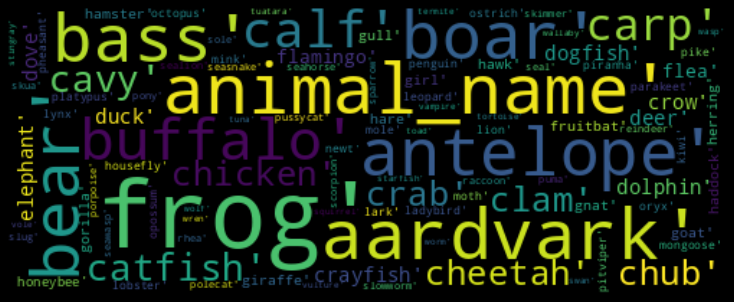

In [66]:
# Wordcloud plot

text = dataset['animal_name'].values
wordcloud = WordCloud(
    width = 500,
    height = 200,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Plot for count of target variable
#### [1:Mammal, 2:Bird, 3:Reptile, 4:Fish, 5:Amphibian, 6:Bug, 7:Invertebrate]

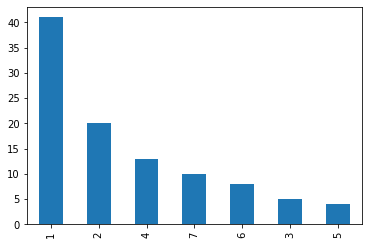

In [67]:
dataset['class'].value_counts(sort=True).head(7).plot.bar()

### Feature engineering

In [68]:
# Predicting the type of animal based on thier names is irrelavant, so reject name as feature

dataset=dataset.drop('animal_name',axis=1)

### Decision tree using ID3 algo

#### Calculate Entropy

In [69]:
def entropy(target_col):
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

#### Information gain

In [70]:
def InfoGain(data,split_attribute_name,target_name="class"):    
    total_entropy = entropy(data[target_name]) 
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain

#### To Build Decision Tree

In [71]:
def ID3(data,originaldata,features,target_attribute_name="class",parent_node_class = None):
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    
    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],return_counts=True)[1])]
    
    elif len(features) ==0:
        return parent_node_class
    
    else:
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],return_counts=True)[1])]
        
        item_values = [InfoGain(data,feature,target_attribute_name) for feature in features]
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        tree = {best_feature:{}}
        
        features = [i for i in features if i != best_feature]
        
        for value in np.unique(data[best_feature]):
            value = value
            sub_data = data.where(data[best_feature] == value).dropna()
            subtree = ID3(sub_data,dataset,features,target_attribute_name,parent_node_class)
            tree[best_feature][value] = subtree
            
        return(tree)    

In [72]:
def predict(query,tree,default = 1):
    for key in list(query.keys()):
        if key in list(tree.keys()):
            try:
                result = tree[key][query[key]] 
            except:
                return default
  
            result = tree[key][query[key]]
            if isinstance(result,dict):
                return predict(query,result)

            else:
                return result

#### Dataset Spliting and Predicting and test accuracy

In [73]:
def train_test_split(dataset):
    training_data = dataset.iloc[:80].reset_index(drop=True)
    testing_data = dataset.iloc[80:].reset_index(drop=True)
    return training_data,testing_data

In [74]:
training_data = train_test_split(dataset)[0]
testing_data = train_test_split(dataset)[1] 

In [75]:
def test(data,tree):
    queries = data.iloc[:,:-1].to_dict(orient = "records")
    predicted = pd.DataFrame(columns=["predicted"]) 
    
    for i in range(len(data)):
        predicted.loc[i,"predicted"] = predict(queries[i],tree,1.0) 
    print('The prediction accuracy is: ',(np.sum(predicted["predicted"] == data["class"])/len(data))*100,'%')

In [76]:
tree = ID3(training_data,training_data,training_data.columns[:-1])
pprint(tree)
test(testing_data,tree)

{'legs': {'0': {'fins': {'0': {'toothed': {'0': '7', '1': '3'}},
                         '1': {'eggs': {'0': '1', '1': '4'}}}},
          '2': {'hair': {'0': '2', '1': '1'}},
          '4': {'hair': {'0': {'toothed': {'0': '7', '1': '5'}}, '1': '1'}},
          '6': {'aquatic': {'0': '6', '1': '7'}},
          '8': '7',
          'legs': 'class'}}
The prediction accuracy is:  86.36363636363636 %
